<a href="https://colab.research.google.com/github/NicoMontoya/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lefty vs Righty in tennis. Who wins?

The popular belief in the tennis community is that left handed tennis players have an advantage over right handed tennis players.  Pinnacle.com has a few articles on the subject.  I was also able to find a study that even includes some data at the amateur level.. although the data is not completely transparent.  

Beyond tennis, there are handfuls of articles and studies done when it comes to dominance in sport based on the dominant hand.  Google is magical.  My goal is to provide a comprehensive comparison for the lay person who is interested in the topic, particularly regarding tennis.  

I myself am a left-handed tennis player, who always liked the idea that I had an advantage, yet it did not seem to make winning matches any easier.  To quench my own curiosity, and as a fun experiment, I will analyze some data that includes players in the ATP and their performance against left-handed players.  

Caveats:
- I am left-handed myself, so yes. I am rooting for a particular team in this study..
- The best information out there is at the top level of the game.  It would be even more interesting to do this with amateur data. One day I might.
- There are better and more interesting methods out there I may not currently know about. If interested, please reach out, let me know about them and I will be happy to think about implementing it in future versions of this project :)








In [0]:
## import initial data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

In [0]:
matches_2016 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2016.csv')
pd.set_option('display.max_columns', 500)

In [0]:
players_columns = ['player_id', 'first_name', 'last_name', 'hand', 'birth_date', 'country_code']
atp_players = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_players.csv', names=players_columns,encoding="ISO-8859-1")


In [5]:
ranking_columns = ['ranking_date', 'ranking', 'player_id', 'ranking_points']
rankings = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_rankings_10s.csv', names=ranking_columns)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
rankings['ranking_date'] = pd.to_datetime(rankings['ranking_date'],format='%Y%m%d', errors='ignore')

In [0]:
rankings2016 = rankings[rankings['ranking_date'].dt.year == 2016]

In [0]:
rankings_players_2016 = pd.merge(rankings2016, atp_players, on='player_id').sort_values(by=['ranking_date', 'ranking'])

In [0]:
year_end_ranking_2016 = rankings_players_2016[rankings_players_2016['ranking_date'] == '2016-12-26']

In [10]:
year_end_ranking_2016['hand'].value_counts()

R    1034
U     889
L     155
Name: hand, dtype: int64

In [0]:
top100_ranking = year_end_ranking_2016[year_end_ranking_2016['ranking'] <= 100]

In [12]:
top100_ranking['hand'].value_counts()

R    82
L    18
Name: hand, dtype: int64

In [0]:
winner_top_100 = matches_2016[matches_2016['winner_rank'] <= 100]

In [0]:
top100_matches = winner_top_100[winner_top_100['loser_rank'] <= 100].sort_values(by='winner_rank')

In [17]:
top100_matches.shape

(1776, 49)

In [18]:
top100_matches['winner_hand'].value_counts(normalize=True)


R    0.86768
L    0.13232
Name: winner_hand, dtype: float64

In [19]:
top100_matches['loser_hand'].value_counts(normalize=True)

R    0.845721
L    0.154279
Name: loser_hand, dtype: float64

In [20]:
top100_ranking['hand'].value_counts(normalize=True)

R    0.82
L    0.18
Name: hand, dtype: float64

In 2016, there were 1,776 matches played between players ranked in the top 100.

By year end ranking, there were 82 right handeres and 18 left handers in the top 100. 

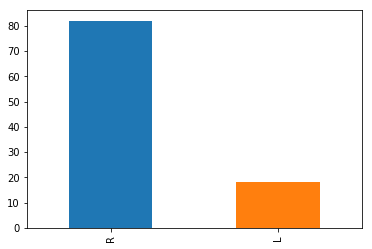

In [21]:
top100_ranking['hand'].value_counts().plot.bar()

Start simple, 10% of the population is said to be left handed.  Yet 18% of the top 100 in 2016 were left handed.  We can test against the null hypothesis of 10 percent to see if there is a significant difference.

In [23]:
top100_ranking['hand'] = top100_ranking['hand'].replace({'R':0, 'L':1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
stats.ttest_1samp(top100_ranking['hand'], .10)

Ttest_1sampResult(statistic=2.071879081131248, pvalue=0.040876488001518975)

Null hypothesis = 10% of the population is made up of left handers.

Alternative hypothesis = In tennis, left handers make up more of the population than the average population in the ATP top 100 rankings. > than .10.

A t-statistic of .04 allows us to reject the null hypothesis and say that in 2016, a statistically significant number of left handers made up more of the top 100 in the ATP tennis rankings.

Interesting.. let's keep digging

